# XBeach Post Process

In [1]:
import sys;sys.path.append('../xbeach/')
from utils import *
from importlib import reload
from libs import *
import glob
from PIL import Image
import matplotlib
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

In [2]:
root = pl.Path(r'Z:\Users\Tyler\projects\dunex\duck')
xb = nc4.Dataset(str(root / 'xboutput.nc'))
#xb2 = nc4.Dataset(str(root / 'deal_island' / 'output2' / 'xboutput.nc'))

In [3]:
z = xb.variables['zb_mean'][:,:]
x = xb.variables['globalx'][:,:]
t = xb.variables['meantime'][:]
h = xb.variables['H_mean'][:]
zs = xb.variables['zs_mean'][:]

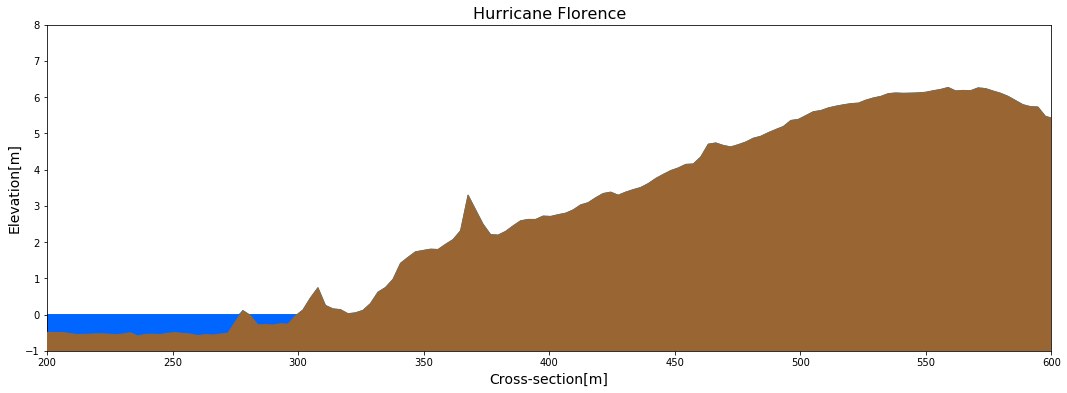

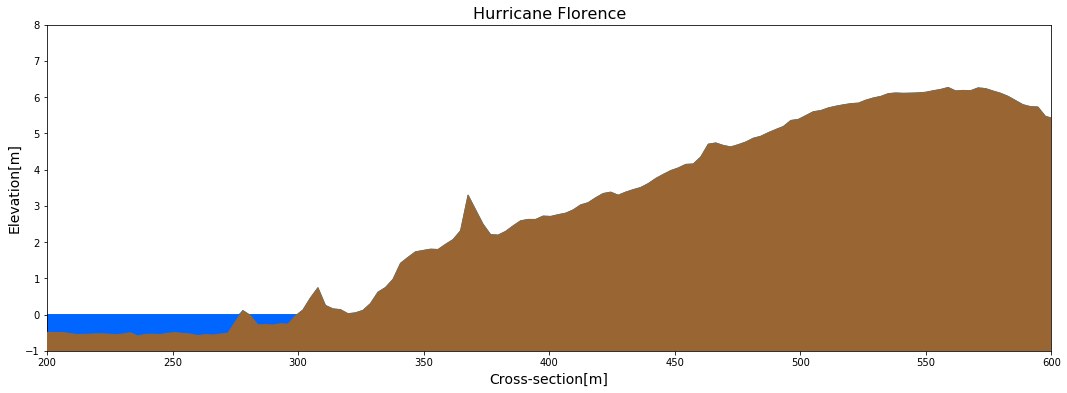

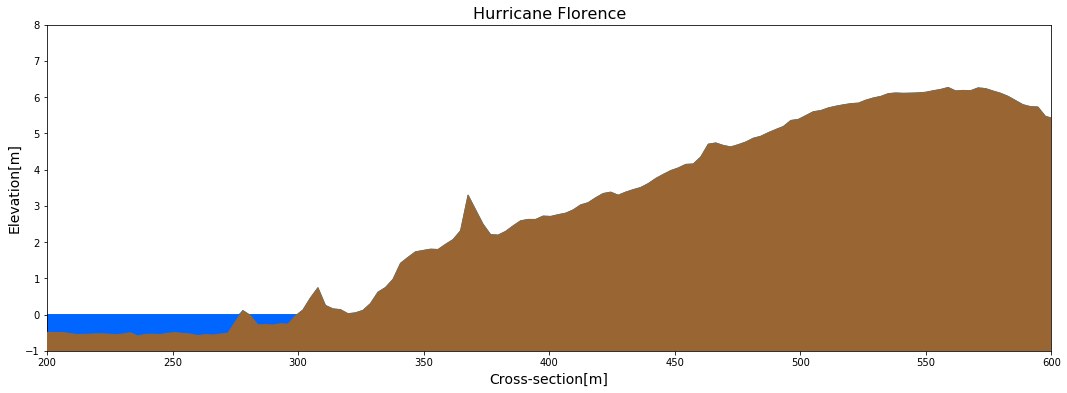

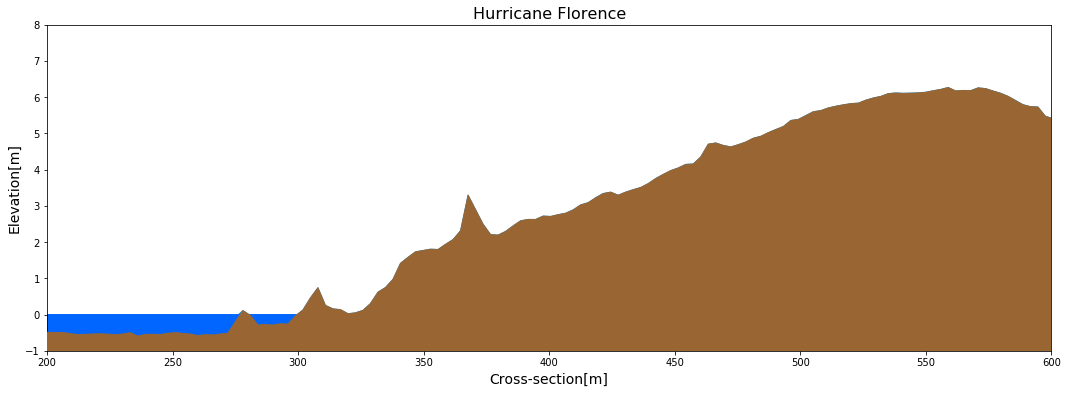

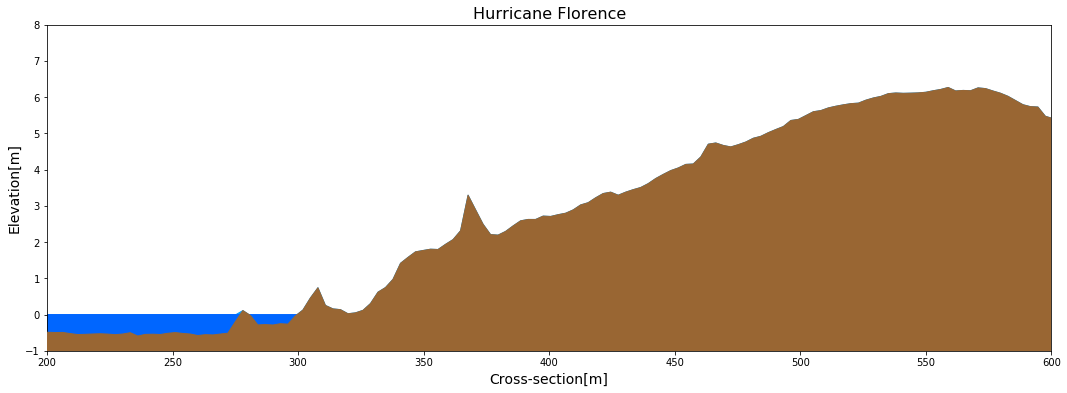

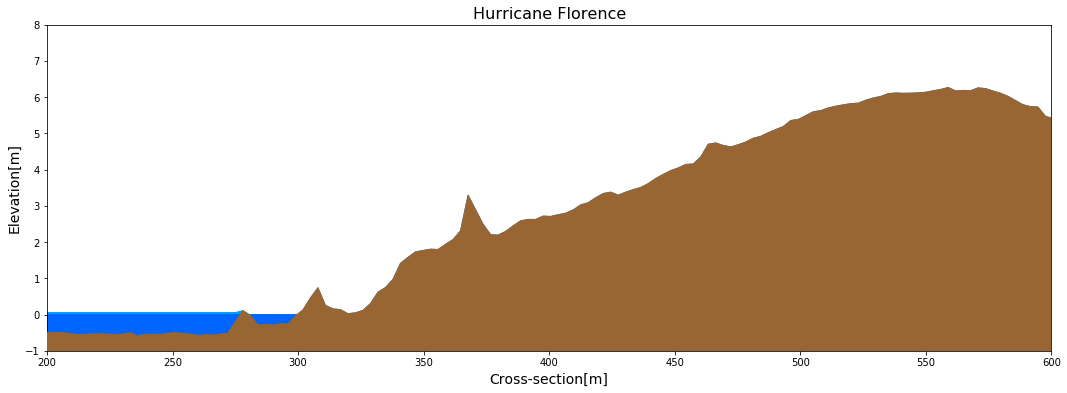

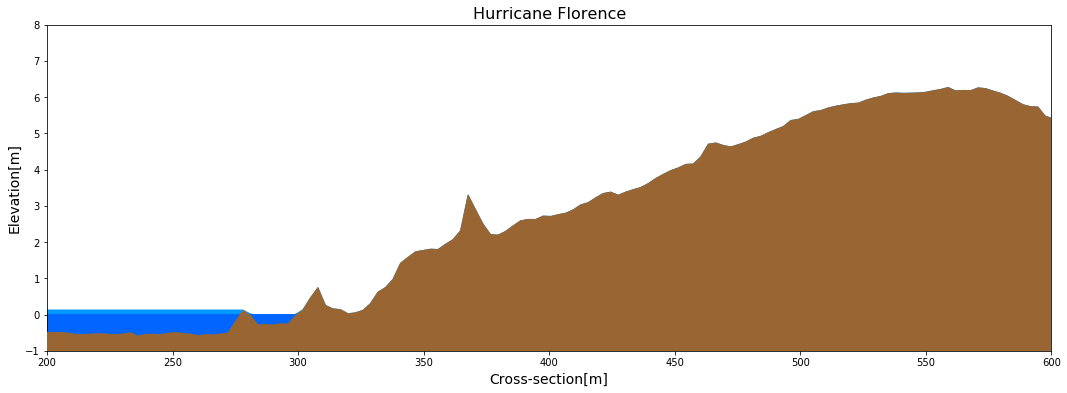

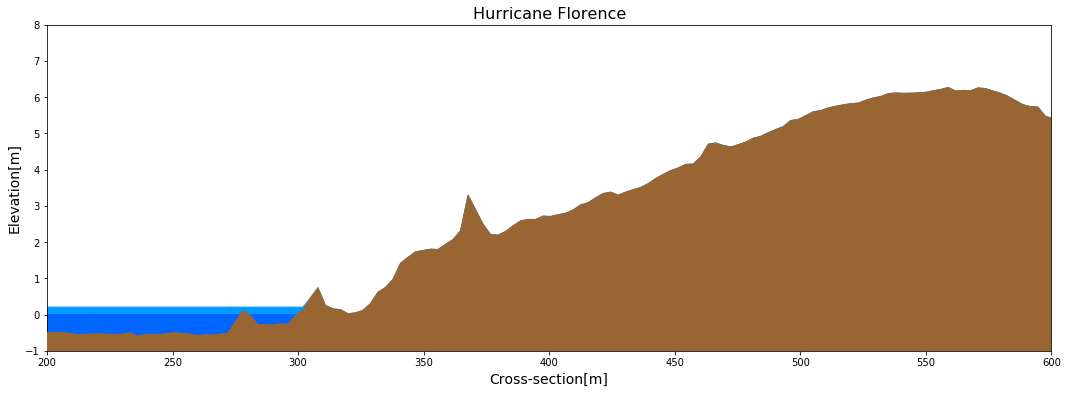

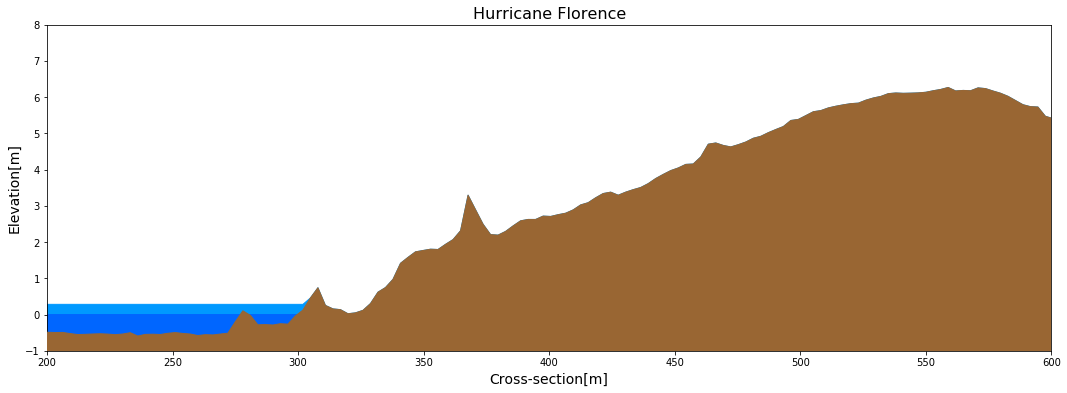

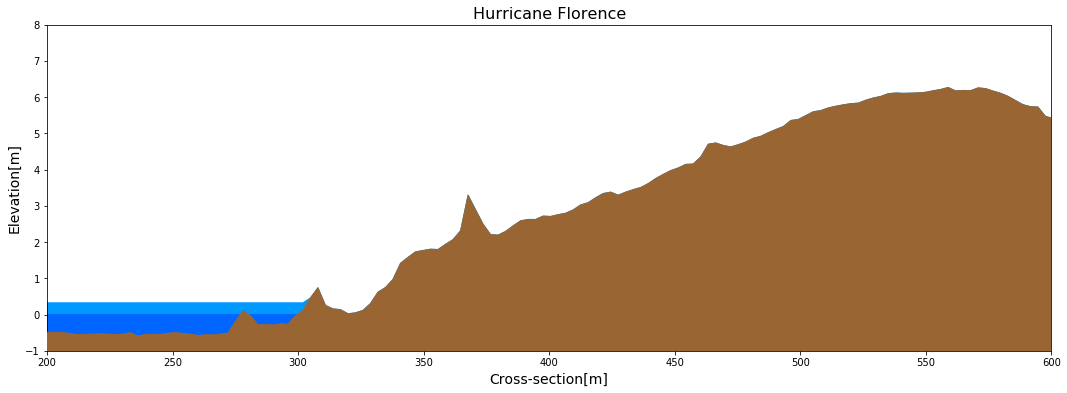

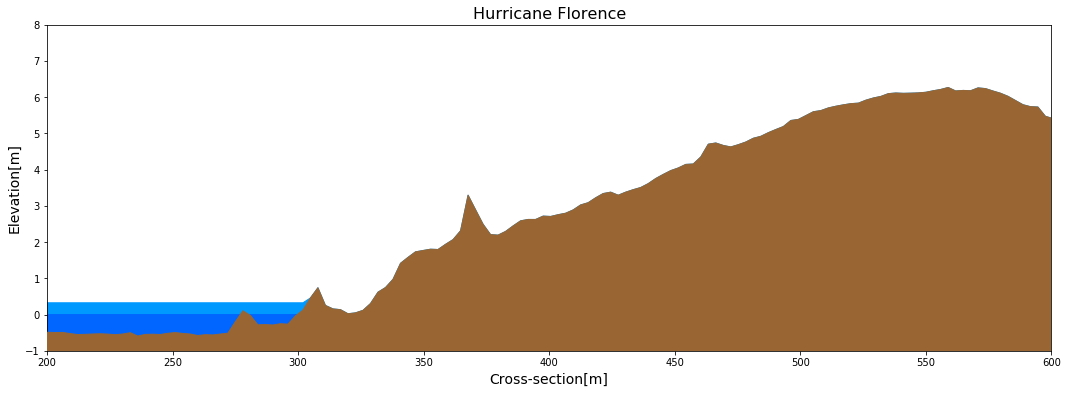

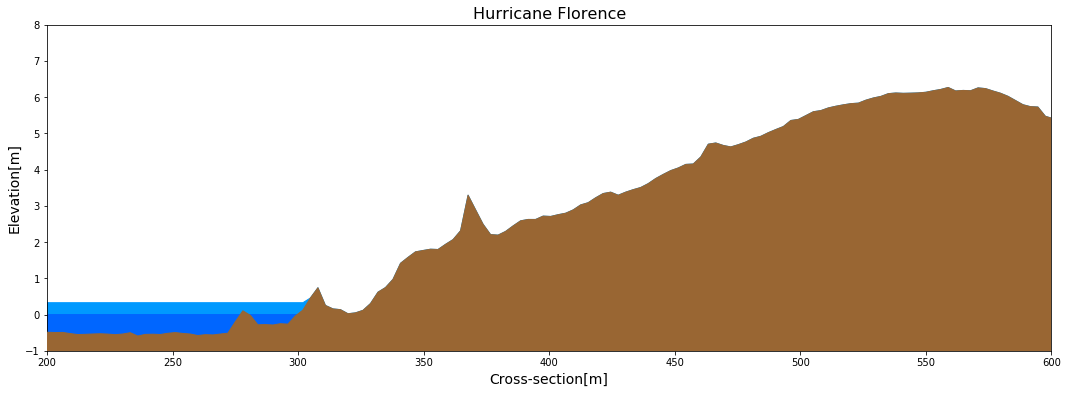

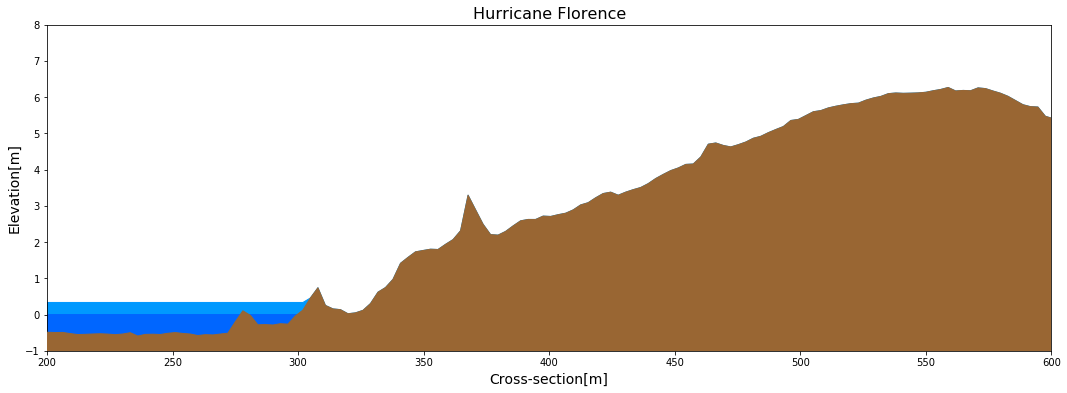

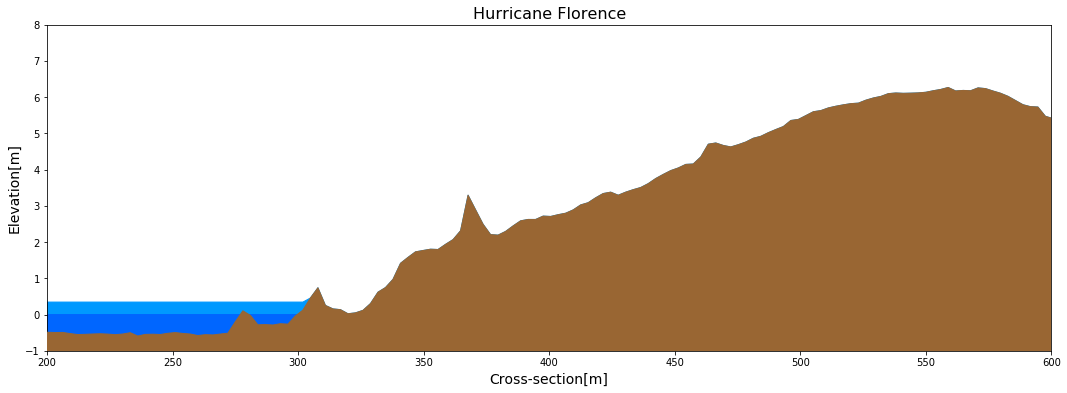

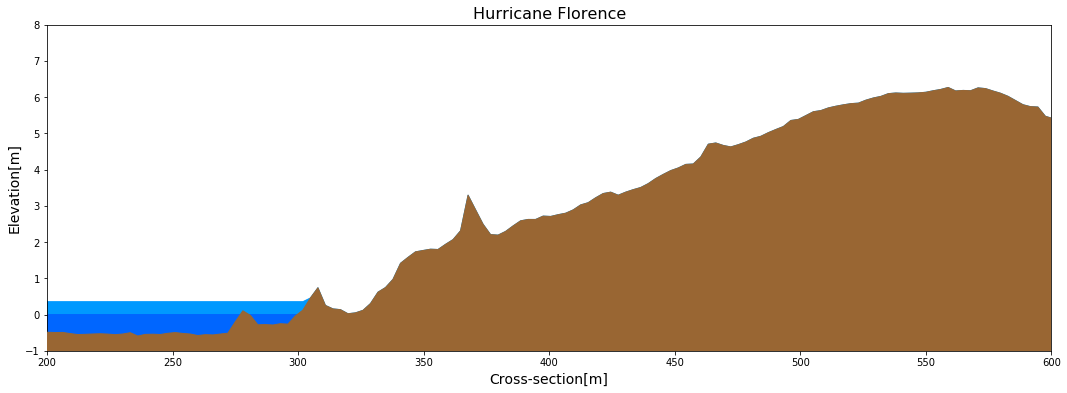

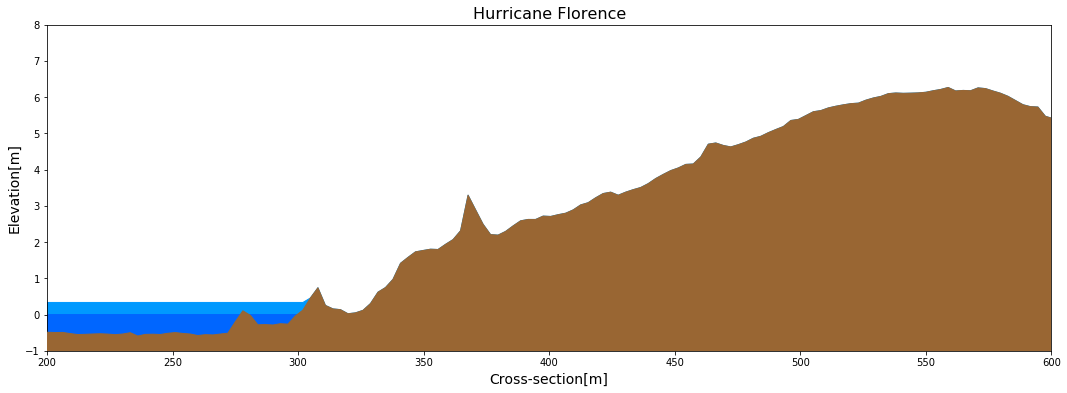

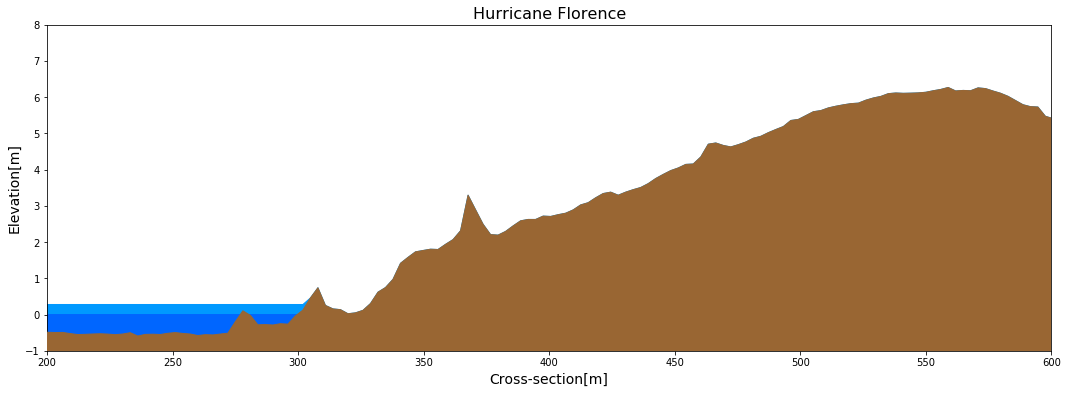

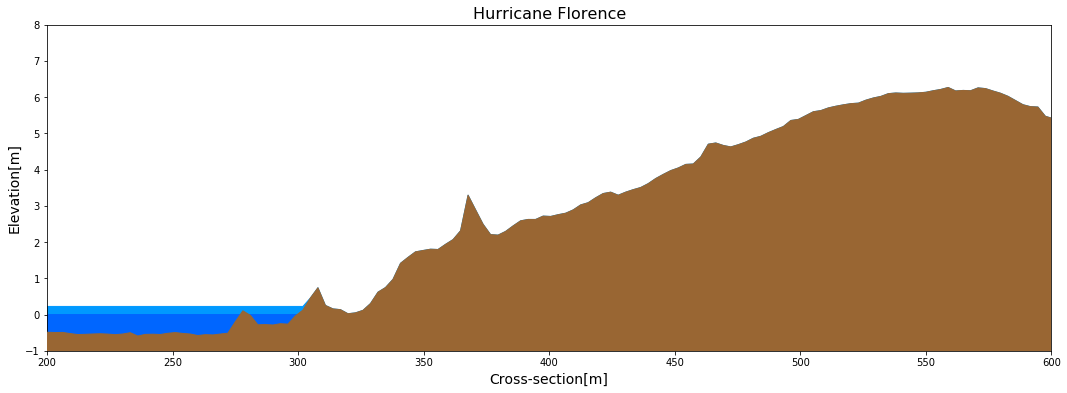

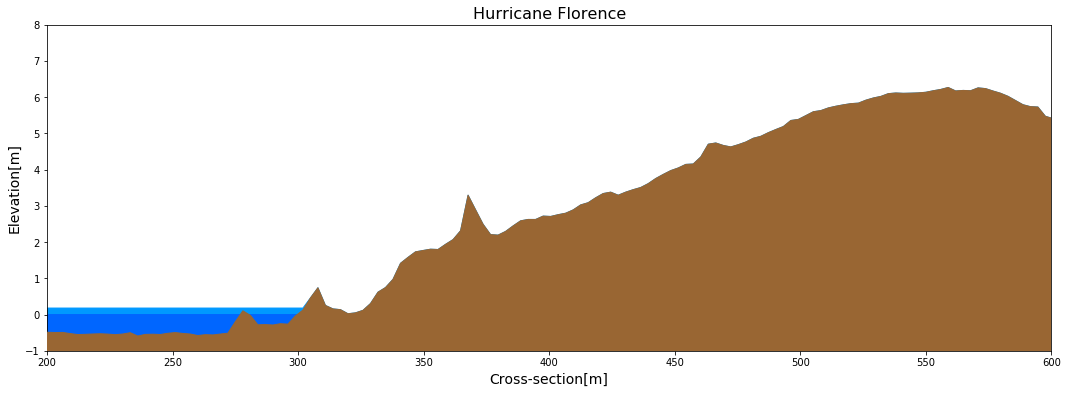

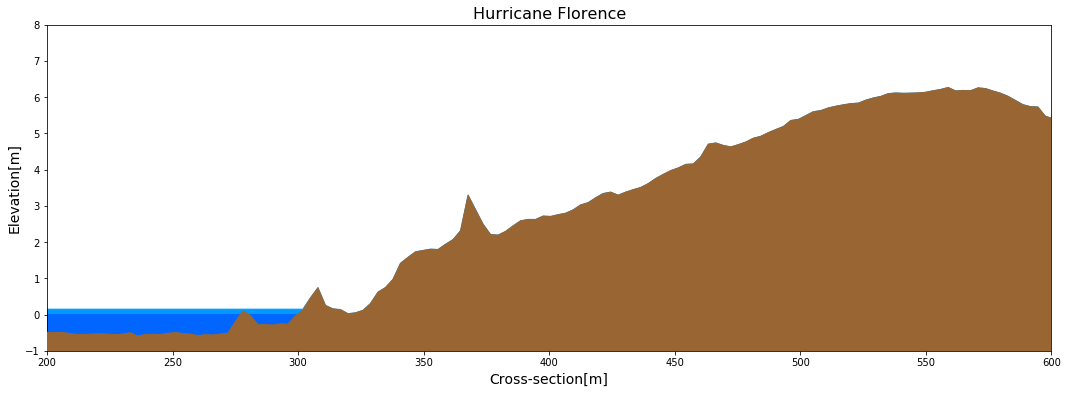

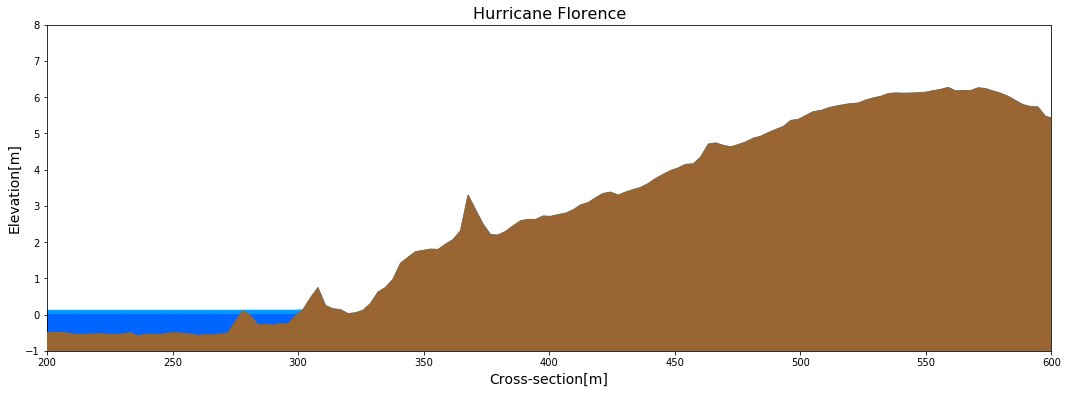

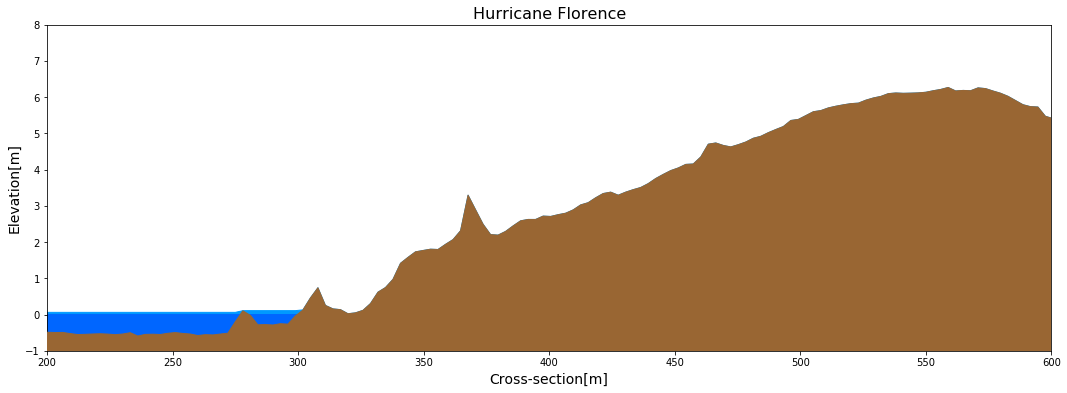

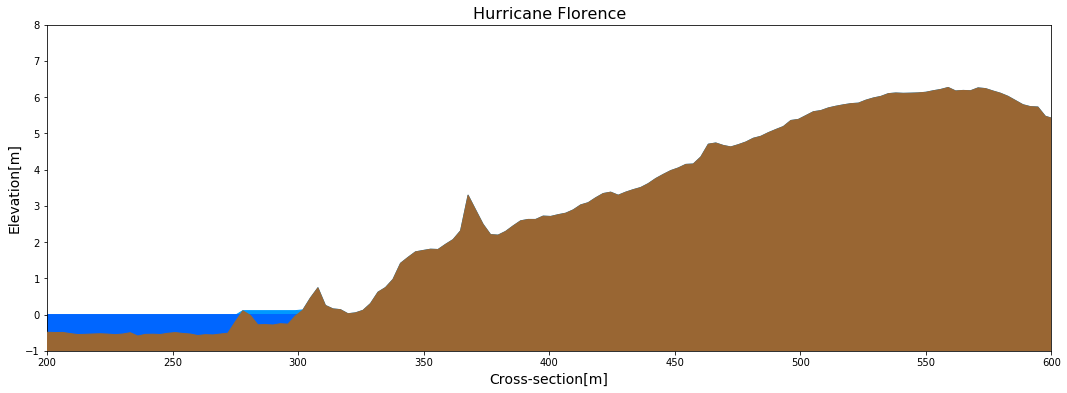

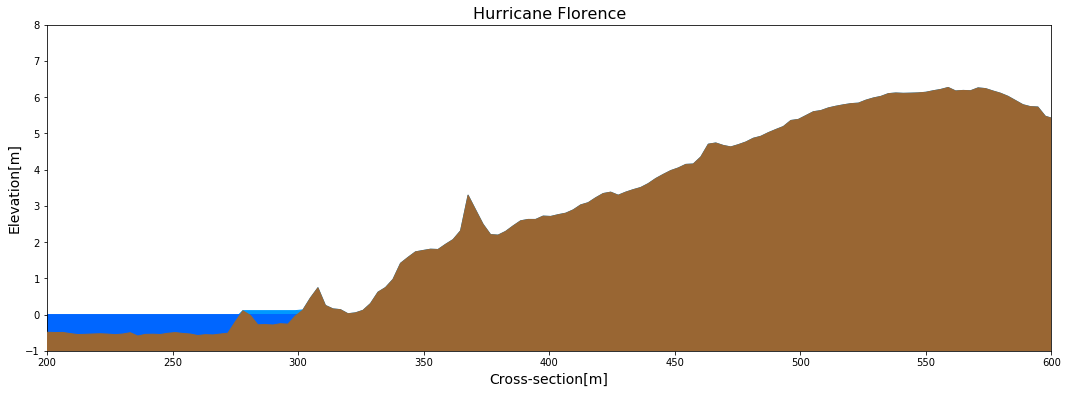

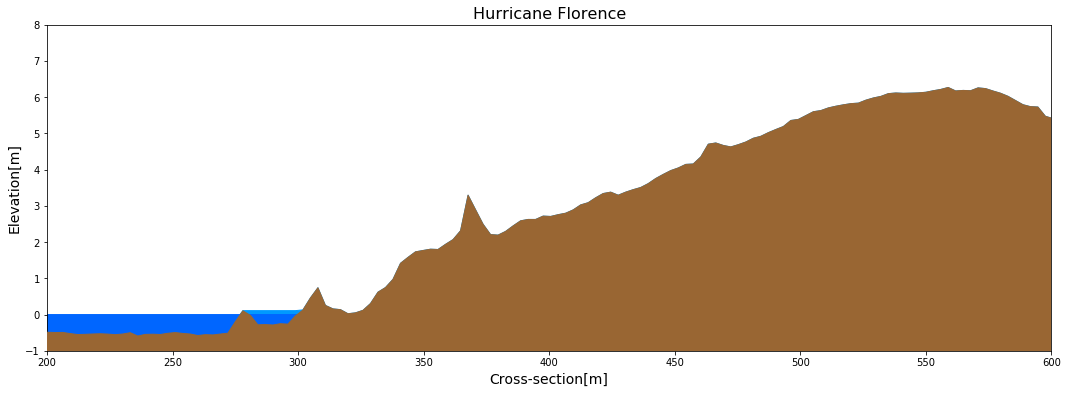

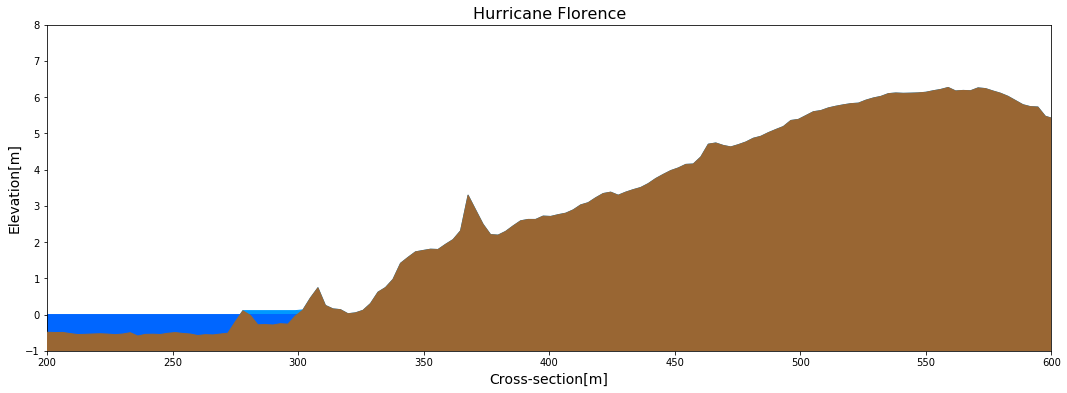

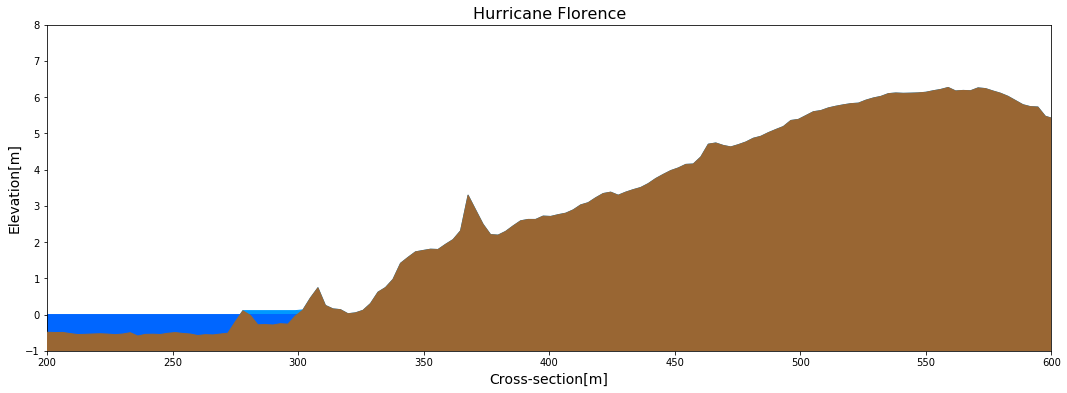

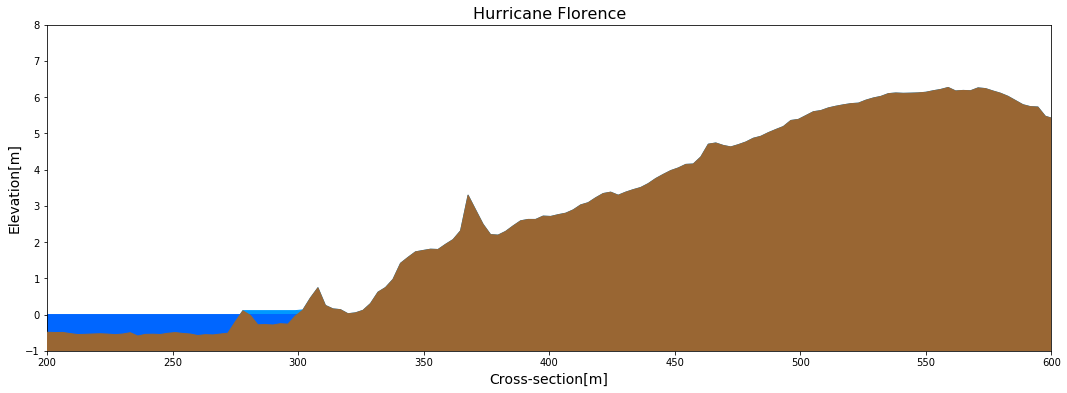

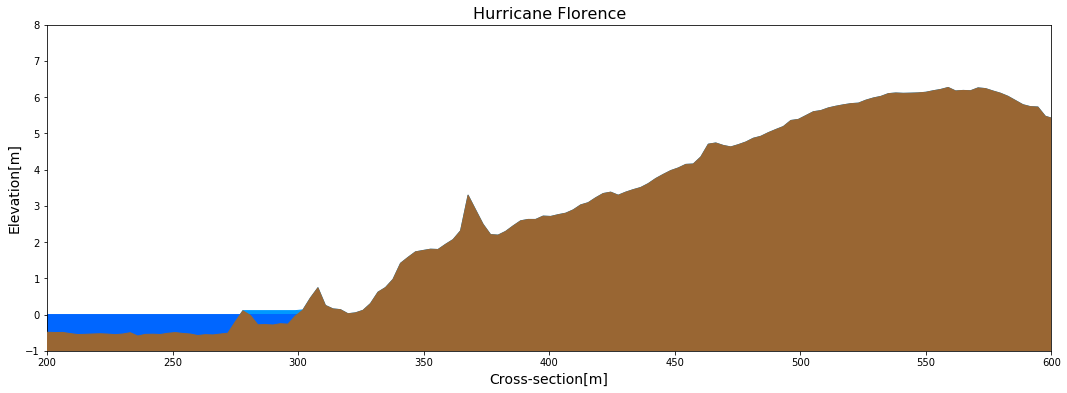

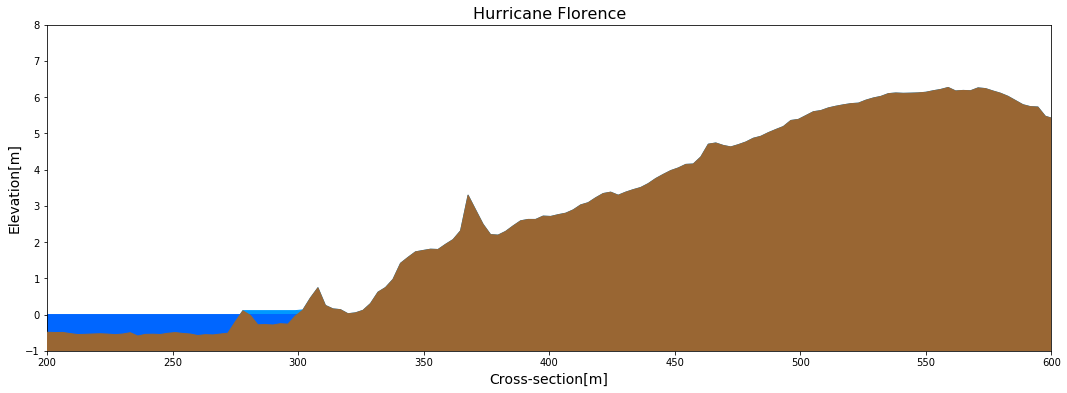

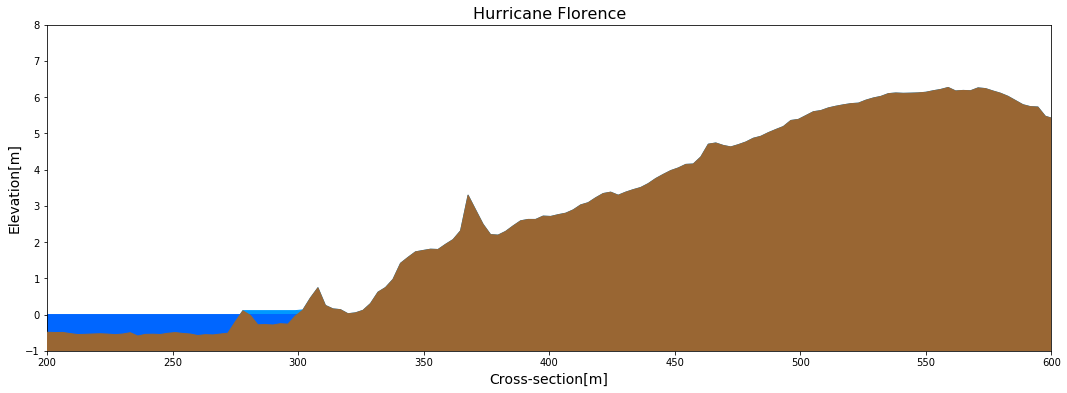

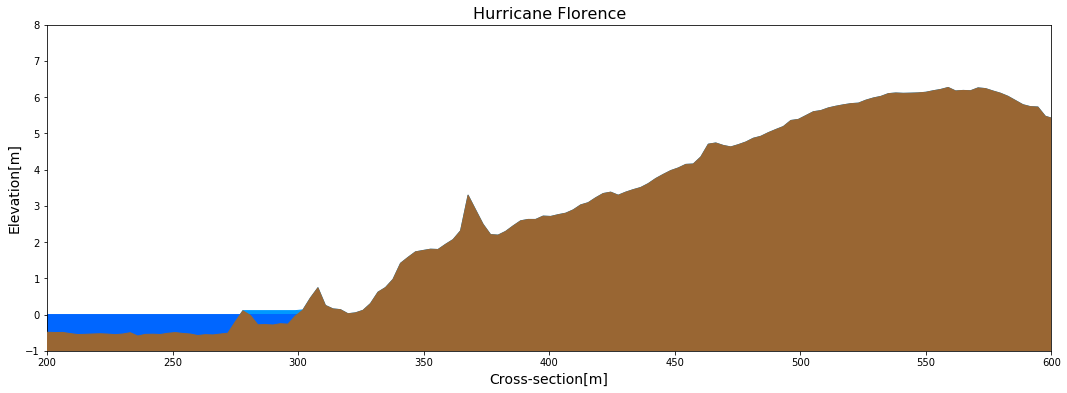

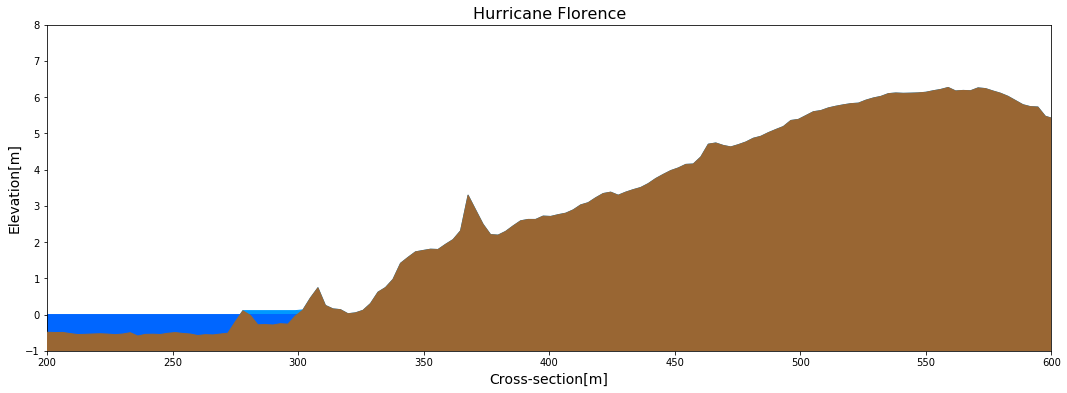

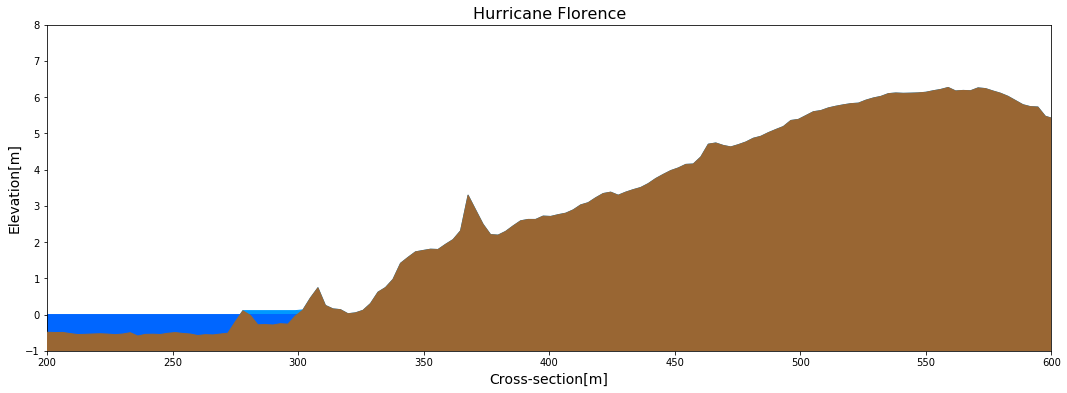

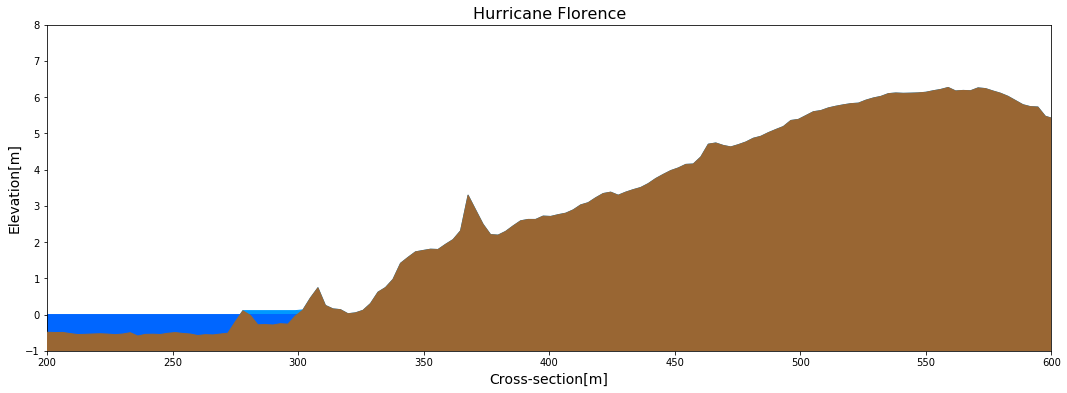

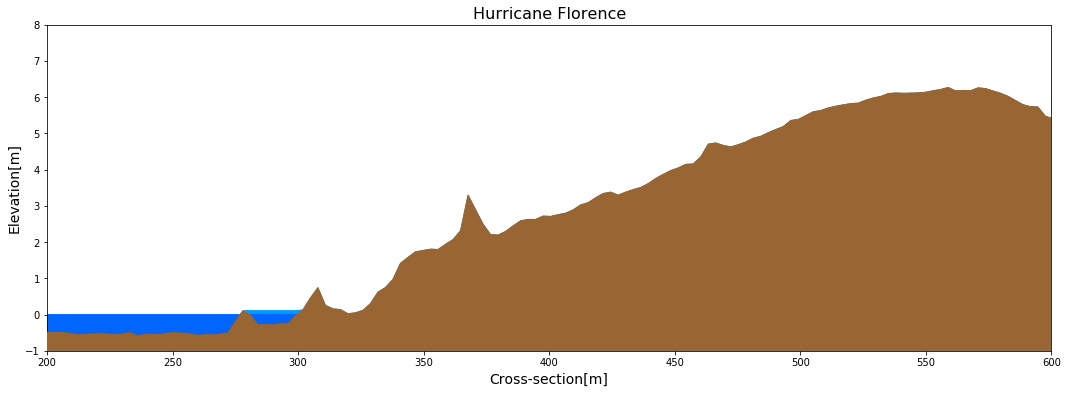

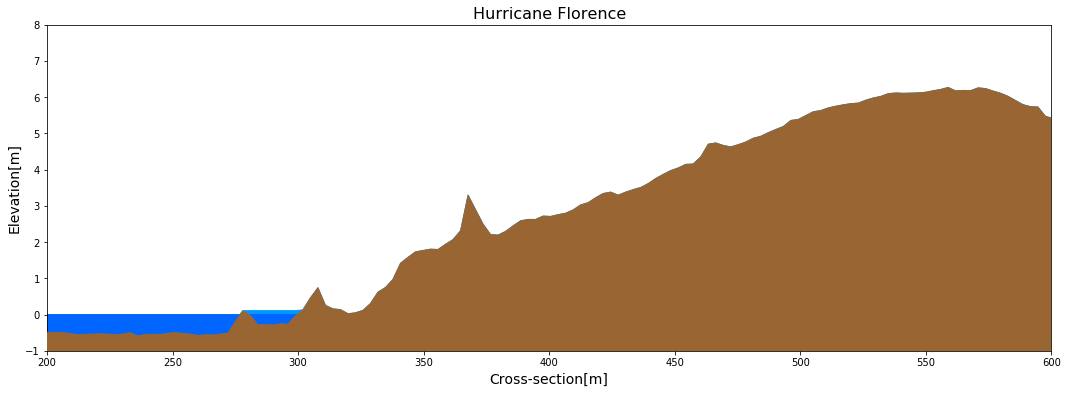

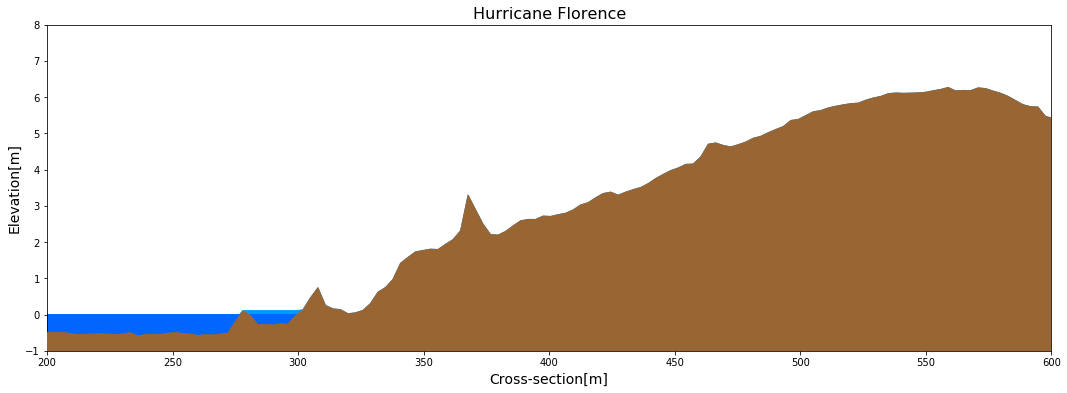

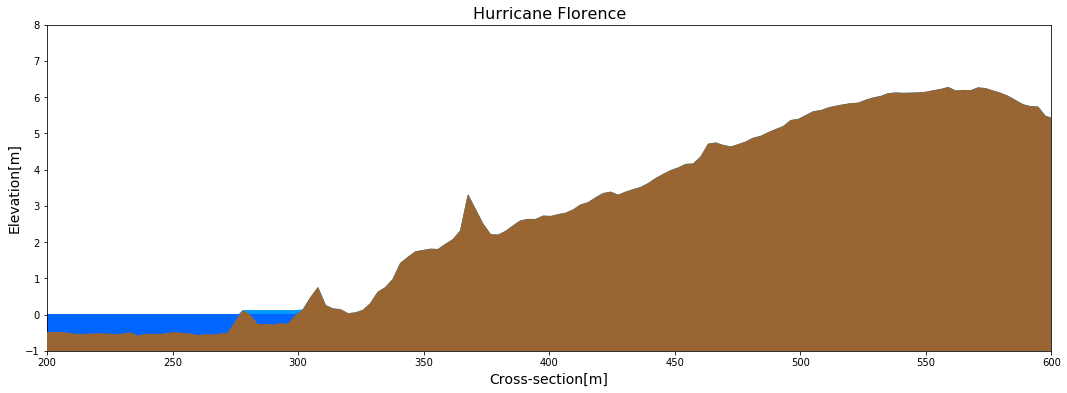

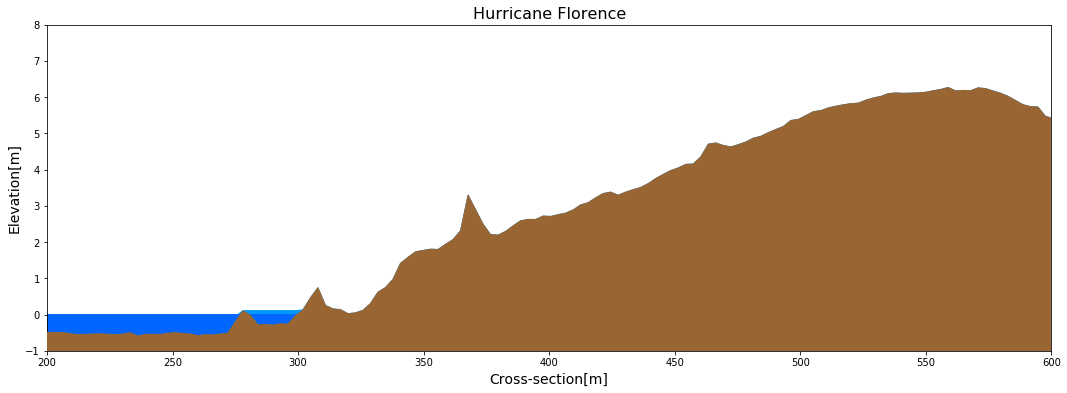

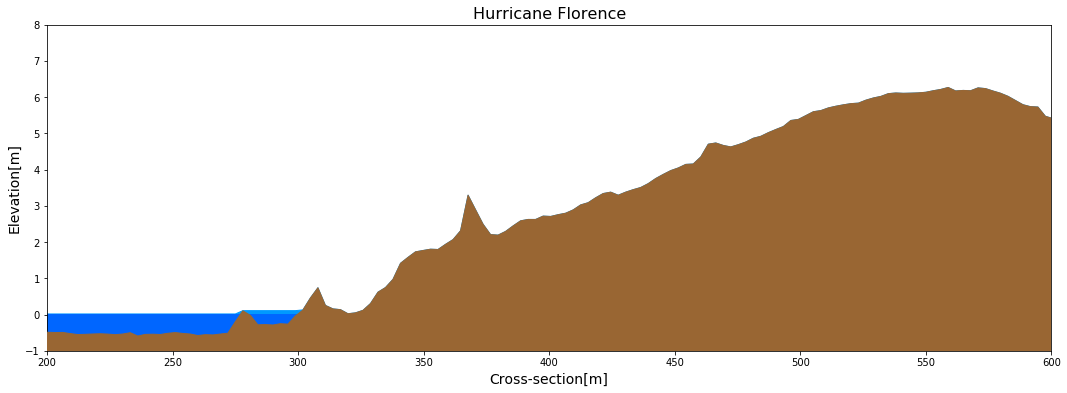

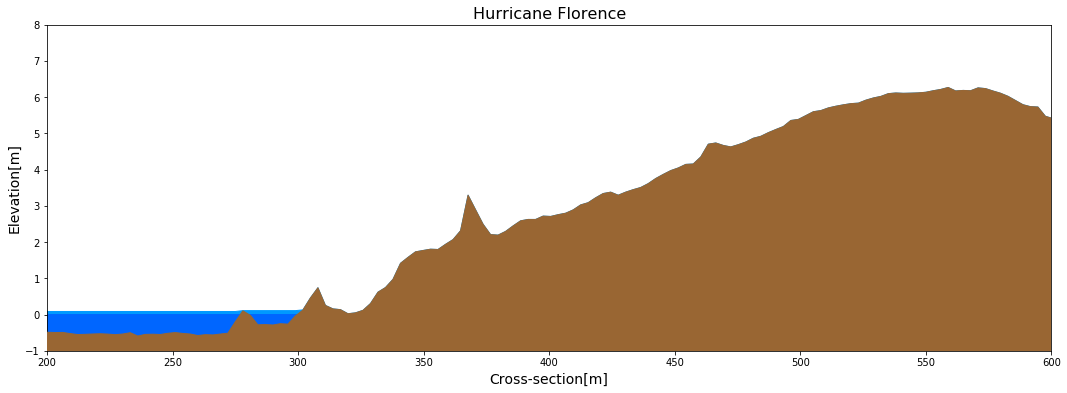

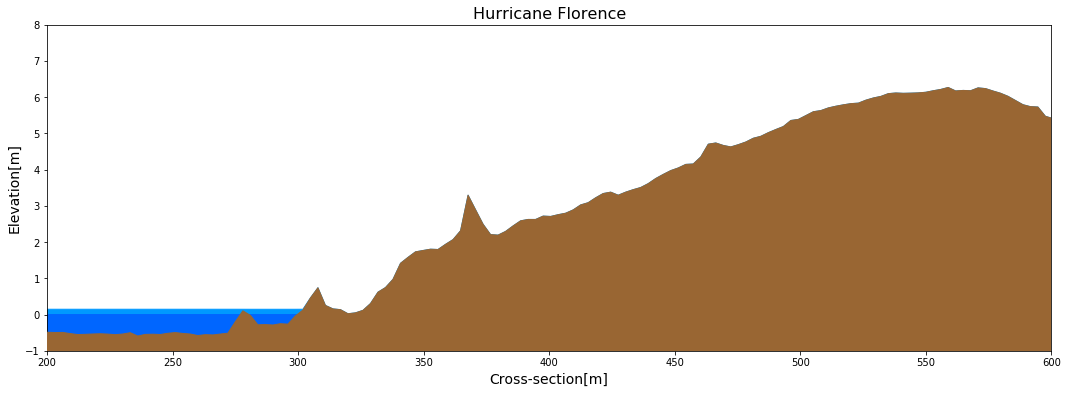

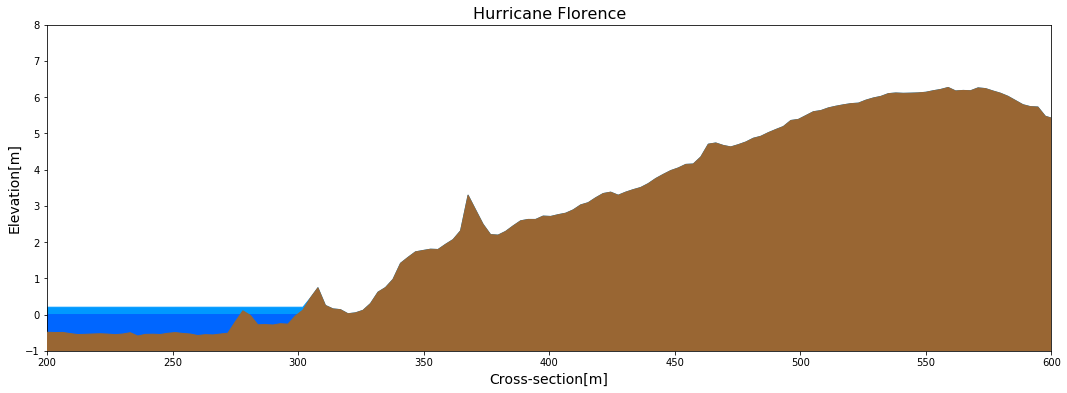

In [6]:

for i in range(0,44):
    fig,ax = plt.subplots(figsize=(18,6))
    #ax.plot(x[0,:],z[0,:,:][0])
    waves = ax.fill_between(x[0,:],zs[i,:,:][0]+h[0,:,:][0],-8,color='#0099ff')
    water = ax.fill_between(x[0,:],zs[i,:,:][0]*.00025,-8,color='#0066ff')
    topo = ax.fill_between(x[0],z[i,:,:][0],-45,color='#996633',zorder=3)
    

    ax.set_xlabel('Cross-section[m]',fontsize=14)
    ax.set_ylabel('Elevation[m]',fontsize=14)
    ax.set_title('Hurricane Florence',fontsize=16)
    ax.set_xlim([200,600])
    ax.set_ylim([-1,8])
    plt.show()

In [5]:
vege = []
for ii in range(0,len(z[0,:,:][0])):
    if z[0,:,ii][0]>0.3:
        vege.append(0.4)
    else:
        vege.append(0)

In [26]:
wl=[]
start = '2019052200'
start_date = datetime.strptime(start,'%Y%m%d%H')
for i in range(5,200):
    file_number = '%05d'%i
    wl.append('WL{}.png'.format(file_number))
    fig = plt.figure(figsize=(12,8))
    ax1 = plt.axes([0,.53,1,.365])
    ax2 = plt.axes([0,0.15,1,.365])
    ax3 = plt.axes([0,0,1,0.12])
    waves = ax1.fill_between(x[0,:],zs[i,:,:][0]+h[i,:,:][0],-3,color='#0099ff')
    water = ax1.fill_between(x[0,:],zs[i,:,:][0],-3,color='#0066ff')
    topo = ax1.fill_between(x[0],z[i,:,:][0],-3,color='#996633',zorder=3)
    for ii in range(0,len(vege)):
        vege2 = ax1.plot((x[:,ii],x[:,ii]),(z[i,:,ii],z[i,:,ii]+vege[ii]),color='#009933')
    ax1.set_xlim([90,250])
    ax1.set_ylim([-0.5,2.5]) 
    ax1.set_xticks([])
    ax1.set_ylabel('Elevation [ft]',fontsize=14)
    ax1.set_title('Deal Island, MD'+' {}'.format(start_date + timedelta(minutes=i*20)),fontsize=14)
    #ax1.legend((waves,water,topo),('$H_{s}$','Water Level','Topo/Bathy'),frameon=False,fontsize=14)
    ax2.fill_between(x2[0,:],zs2[i,:,:][0]+h2[i,:,:][0],-3,color='#0099ff')
    ax2.fill_between(x2[0,:],zs2[i,:,:][0],-3,color='#0066ff')
    ax2.fill_between(x2[0],z2[i,:,:][0],-3,color='#996633',zorder=3)
    ax2.set_xlim([90,250])
    ax2.set_ylim([-0.5,2.5])
    ax2.set_ylabel('Elevation [ft]',fontsize=14)
    ax2.set_xticks([])

    diff = abs(h[i,:,:][0] - h2[i,:,:][0])
    hd, = ax3.plot(x[0,:],diff,color='#009933')
    hv, = ax3.plot(x[0,:],h[i,:,:][0],color='#0099ff')
    hn, = ax3.plot(x2[0,:],h2[i,:,:][0],color='#cc00ff')
    ax3.set_ylim([0,0.5])
    ax3.set_xlim([90,250])
    ax3.set_xlabel('Cross-shore[ft]',fontsize=14)
    ax3.set_ylabel('Wave Height+ (ft)',fontsize=14)
    ax3.legend((waves,water,topo,hd,hv,hn),
               ('$H_{s}$','Water Level','Elevation','$H_{s}$ Difference','$H_{s}$ with Vegetation','$H_{s}$ no Vegetation'),
               ncol=10,frameon=False,fontsize=12,bbox_to_anchor=(0.94,-0.6))
    plt.savefig('WL{}.png'.format(file_number),dpi=600,bbox_inches = 'tight', pad_inches = 0.1)
    plt.close()

images = []
for ii in range(0,len(wl)):
    frames = Image.open(wl[ii])
    images.append(frames)
images[0].save('xbeach_deal.gif',
   save_all=True,
   append_images=images[1:],
   delay=.1,
   duration=200,
   loop=0)
for f in glob.glob('WL*'):
    os.remove(f)   


In [7]:
root = pl.Path(r'Z:\Users\Tyler\projects\TNC\modeling')
root2= pl.Path(r'Z:\Project_TNC\3_Field\2_Data\2_Processed')
wave1 = trublues(str(root2 / '2_trublue' / 'di_20180912' / 'after_juan' / 'adcp1.mat'))
wave2 = trublues(str(root2 / '2_trublue' / 'di_20180912' / 'after_juan' / 't1s2.mat'))
wave3 = trublues(str(root2 / '2_trublue' / 'di_20180912' / 'after_juan' / 't1s4.mat'))

In [45]:
images = []
for ii in range(0,len(wl)):
    frames = Image.open(wl[ii])
    images.append(frames)
images[0].save('xbeach_deal.gif',
   save_all=True,
   append_images=images[1:],
   delay=.1,
   duration=200,
   loop=0)
for f in glob.glob('WL*'):
    os.remove(f)   

249

In [3]:
root2 = pl.Path(r'Z:\Users\Tyler\projects\forecast\xbeach')
eqn2 = ['output1','output2']

In [11]:
s_loc = [22.57,35.967,48.66,61.62,83.827]
obs = [wave1['h0'][238],wave2['h0'][405],wave3['h0'][406]]
#eqn = ['jadhav','garzon_qre','garzon_qkc','smith','no_veg']
eqn = ['garzon_qre','no_veg']
colors = ['#ff0000','#0000ff','#e68a00','#33cc33','#cc00cc']#,'#000000'
colors2= ['#33cc33','#cc00cc']

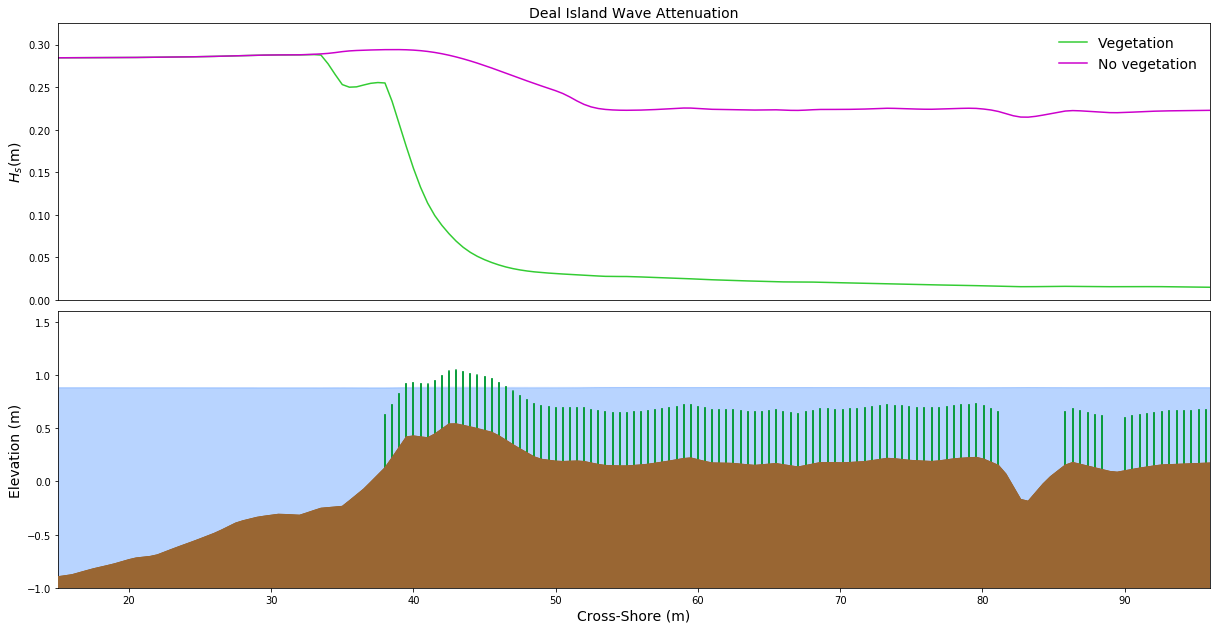

In [13]:
fig = plt.figure(figsize=(16,8))
ax1 = plt.axes([0,.5,1,.48])
ax2 = plt.axes([0,0,1,.48])
ii = 25
for i in range(0,len(eqn)):
    xb = nc4.Dataset(str(root / 'validation' / eqn[i] / 'xboutput.nc'))
    xb2 = nc4.Dataset(str(root / 'validation' / eqn[i] / 'xboutput.nc'))
    z = xb.variables['zb_mean'][i,:]
    x = xb.variables['globalx'][:,:]
    vege = []
    for ii in range(0,len(z[0,:])):
        if z[:,ii]>0.1:
            vege.append(0.5)
        else:
            vege.append(0)
    

    
    #z = xb.variables['zb_mean'][0,:][0]
    t = xb.variables['meantime'][:]
    h = xb.variables['H_mean'][:]
    zs = xb.variables['zs_mean'][:]
    plt.box(on=None)
    ax1.plot(x[0,:],h[20,:,:][0]/.707,color=colors2[i])
   # ax1.scatter((x[:,45],x[:,91],x[:,166]),(obs[0],obs[1],obs[2]+0.01),color='black',zorder=8)
   # ax1.annotate('Station 1',xy=(x[:,45]-1.35,obs[0]+0.01))
   # ax1.annotate('Station 2',xy=(x[:,91]+.8,obs[1]+0.01))
   # ax1.annotate('Station 3',xy=(x[:,166]-1.35,obs[2]+0.04))
    ax1.set_ylim([0,1])
    ax1.set_xlim([15,96])
    ax1.set_ylim([0,.325])
    ax1.set_xticks([])
    for ii in range(0,len(vege)):
        vege2 = ax2.plot((x[:,ii],x[:,ii]),(z[:,ii],z[:,ii]+vege[ii]),color='#009933')
    ax1.legend(('Vegetation','No vegetation'),frameon=False,fontsize=14)
    ax2.fill_between(x[0,:],zs[20,:,:][0],-3,color='#0066ff',alpha=0.15)
    ax2.fill_between(x[0],z[0],-3,color='#996633',zorder=3)
    
    #ax2.plot(x[0,:],zs[20,:,:][0],'b')
    ax2.set_ylim([-1,1.6])
    ax2.set_xlim([15,96])
    ax1.set_ylabel('$H_{s}$(m)',fontsize=14)
    ax2.set_ylabel('Elevation (m)',fontsize=14)
    ax2.set_xlabel('Cross-Shore (m)',fontsize=14)
    ax1.set_title('Deal Island Wave Attenuation',fontsize=14)
    plt.box(on=None)
plt.savefig('wave_attenuation.png',dpi=600,bbox_inches = 'tight', pad_inches = 0.01)
plt.show()

In [23]:
xb2 = nc4.Dataset(str(root/'2d'/'april3'/'xboutput.nc'))
x = xb2.variables['globalx'][:]
y = xb2.variables['globaly'][:]
z = xb2.variables['zb_mean'][:]
t = xb2.variables['meantime'][:]
h = xb2.variables['H_mean'][:]
zs = xb2.variables['zs_mean'][:]

In [31]:
wl=[]

for i in range(0,len(t)):
    file_number = '%05d'%i
    fig,ax = plt.subplots(figsize=(18,10))
    
    wl.append('WL{}.png'.format(file_number))
    ax.autoscale_view(tight=True)
    ax.set_title('Deal Island '+str(i))
    normalize = matplotlib.colors.Normalize(vmin=0, vmax=0.25)
    cax, _ = matplotlib.colorbar.make_axes(ax,orientation='vertical')
    cmap = matplotlib.cm.get_cmap('jet')
    cbar = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap, norm=normalize)
    ax.pcolormesh(x,y,h[i,:,:],cmap='jet',vmin=0,vmax=0.25,shading='gouraud')
    plt.savefig('WL{}.png'.format(file_number),dpi=300,bbox_inches = 'tight', pad_inches = 0.1)
    plt.close()
images = []
for ii in range(0,len(wl)):
    frames = Image.open(wl[ii])
    images.append(frames)
images[0].save('xbeach.gif',
   save_all=True,
   append_images=images[1:],
   delay=.1,
   duration=200,
   loop=0)
for f in glob.glob('WL*'):
    os.remove(f)   

<div align="middle"><img style="float:center;" src="xbeach.gif" width=900px></div>

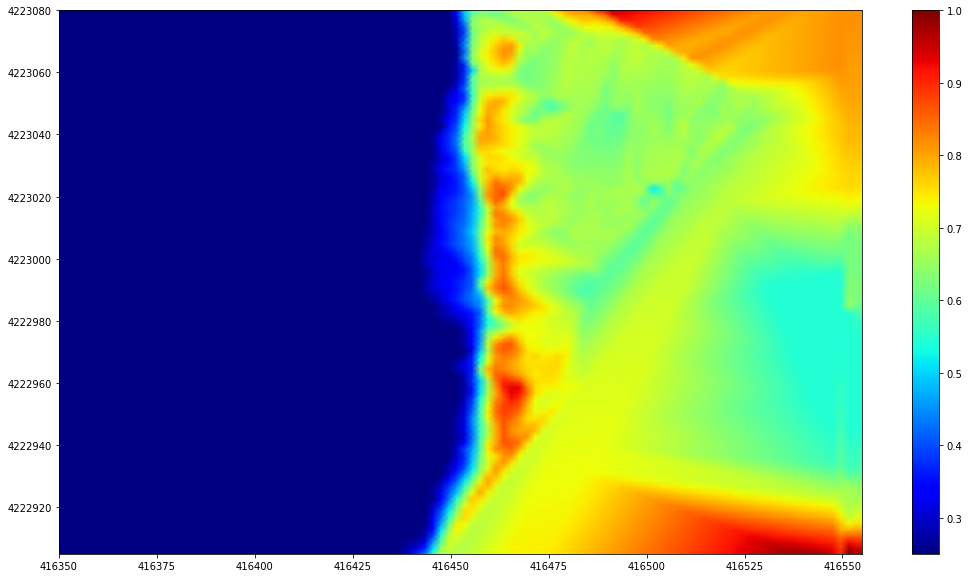

In [58]:
fig,ax = plt.subplots(figsize=(18,10))
ax.pcolormesh(x,y,z[0,:,:],cmap='jet',vmin=-.5, vmax=.75,shading='gouraud')
ax.set_xlim([416350,416555])
ax.set_ylim([4222905,4223080])
normalize = matplotlib.colors.Normalize(vmin=0.25, vmax=1)
cax, _ = matplotlib.colorbar.make_axes(ax,orientation='vertical')
cmap = matplotlib.cm.get_cmap('jet')
cbar = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap, norm=normalize)

In [9]:
wl=[]

for i in range(0,122):
    file_number = '%05d'%i
    fig,ax = plt.subplots(figsize=(18,10))
    ax.pcolormesh(x,y,zs[i,:,:],cmap='jet',shading='gouraud')
    wl.append('WL{}.png'.format(file_number))
    ax.autoscale_view(tight=True)
    ax.set_title('Deal Island '+str(i))
    plt.savefig('WL{}.png'.format(file_number),dpi=300,bbox_inches = 'tight', pad_inches = 0.1)
    plt.close()
images = []
for ii in range(0,len(wl)):
    frames = Image.open(wl[ii])
    images.append(frames)
images[0].save('xbeach_wl.gif',
   save_all=True,
   append_images=images[1:],
   delay=.1,
   duration=200,
   loop=0)
for f in glob.glob('WL*'):
    os.remove(f)  

<div align="middle"><img style="float:center;" src="xbeach_wl.gif" width=900px></div>

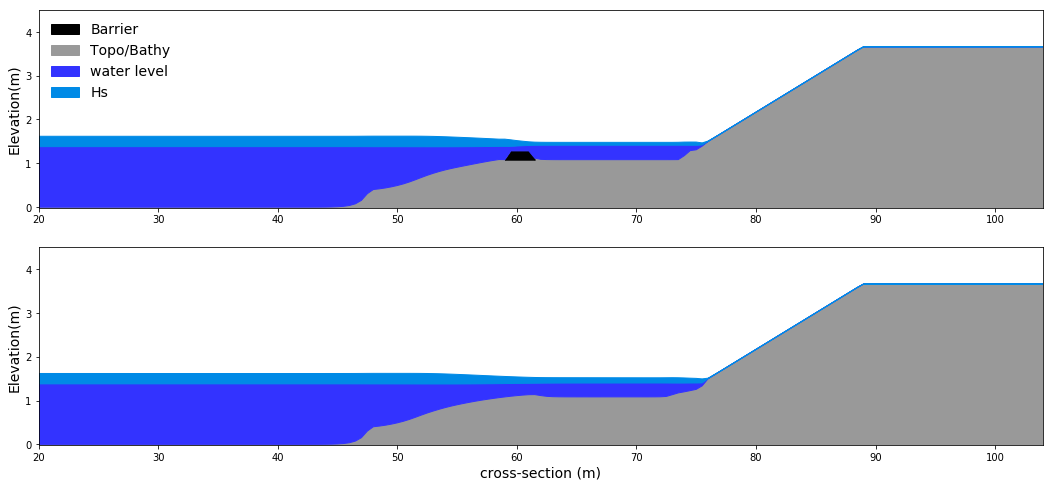

In [46]:
title = 'Flume High Water Low Waves'
title_save = title.split(' ')
x2 = xb2.variables['globalx'][:,:][0]
for ii in range(72,73):
    fig = plt.figure(figsize=(18,8))
    ax1 = plt.subplot(211)
    ax2 = plt.subplot(212)
    
    original = ax1.fill_between(x,xb.variables['zb_mean'][ii,:][0],-1,color='#999999')
    barr     = ax1.fill_between(x[118:124],xb.variables['zb_mean'][0,:][0][118:124],xb2.variables['zb_mean'][0,:][0][118:124],color='#000000')
    water = ax1.fill_between(x,xb.variables['zs_mean'][ii,:][0],xb.variables['zb_mean'][ii,:][0],color='#3333ff')
    waves = ax1.fill_between(x,xb.variables['zs_mean'][ii,:][0],xb.variables['zs_mean'][ii,:][0]+xb.variables['H_mean'][ii,:][0],color='#008ae6')
    ax1.set_ylim([-.01,4.5])
    ax1.set_xlim([20,104])
    ax1.legend([barr,original,water,waves],['Barrier','Topo/Bathy','water level','Hs'],frameon=False,loc=2,fontsize=14)
    ax1.set_ylabel('Elevation(m)',fontsize=14)
   # ax1.set_xticklabels(range(20,104,2),fontsize=12)
    #ax1.set_title(title)
    
    ax2.fill_between(x2,xb2.variables['zb_mean'][ii,:][0],-1,color='#999999')
    #ax2.plot(x2,xb2.variables['zb'][0,:][0])
    #for i in range(0,len(veg)):
    #    if i>75:
    #        vege = ax2.plot((x2[i],x2[i]),(z2[i],z2[i]+veg2[i]),color='#009933')
    ax2.fill_between(x2,xb2.variables['zs_mean'][ii,:][0],xb2.variables['zb_mean'][ii,:][0],color='#3333ff')
    ax2.fill_between(x2,xb2.variables['zs_mean'][ii,:][0],xb2.variables['zs_mean'][ii,:][0]+xb2.variables['H_mean'][ii,:][0],color='#008ae6')    
    ax2.set_ylim([-.01,4.5])
    ax2.set_xlim([20,104])
    ax2.set_xlabel('cross-section (m)',fontsize=14)
    ax2.set_ylabel('Elevation(m)',fontsize=14)
    #ax2.set_xticklabels(range(20,104,2),fontsize=12)
plt.savefig(str(root)+'\\'+title_save[0]+'_'+title_save[1]+'_'+title_save[2]+'_'+title_save[3]+'.png',dpi=450, bbox_inches = 'tight', pad_inches = 0.1)
#plt.show()

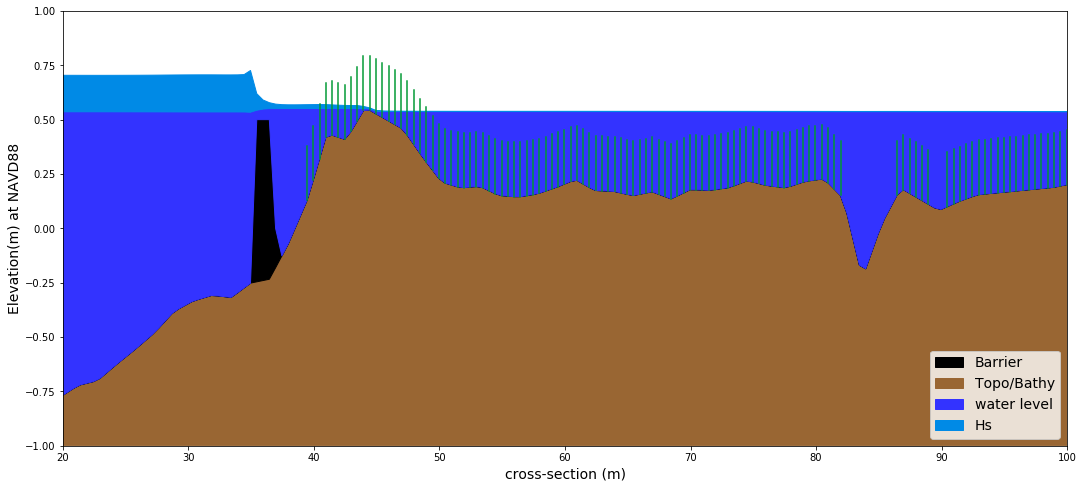

In [22]:
x2 = xb2.variables['globalx'][:,:][0]
for ii in range(18,19):
    fig,ax = plt.subplots(figsize=(18,8))
    original = ax.fill_between(x,xb.variables['zb_mean'][ii,:][0],-1,color='#996633')
    barr     = ax.fill_between(x,xb.variables['zb_mean'][0,:][0],xb2.variables['zb_mean'][0,:][0],color='#000000')
    water = ax.fill_between(x,xb.variables['zs_mean'][ii,:][0],xb.variables['zb_mean'][ii,:][0],color='#3333ff')
    waves = ax.fill_between(x,xb.variables['zs_mean'][ii,:][0],xb.variables['zs_mean'][ii,:][0]+xb.variables['H_mean'][ii,:][0],color='#008ae6')
    for i in range(0,len(veg)):
        if i>75:
            vege = ax.plot((x[i],x[i]),(z[i],z[i]+veg[i]),color='#009933')
    ax.set_ylim([-1,1])
    ax.set_xlim([20,100])
    ax.legend([barr,original,water,waves],['Barrier','Topo/Bathy','water level','Hs'],frameon=True,loc=4,fontsize=14)
    ax.set_ylabel('Elevation(m) at NAVD88',fontsize=14)
    ax.set_xlabel('cross-section (m)',fontsize=14)
plt.savefig(str(root)+'\\'+'deal_xbeach3'+'.png',dpi=450, bbox_inches = 'tight', pad_inches = 0.1)
